<a href="https://colab.research.google.com/github/kelvinfoo123/MH3511-Data-Analysis-with-R/blob/main/MH3511_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

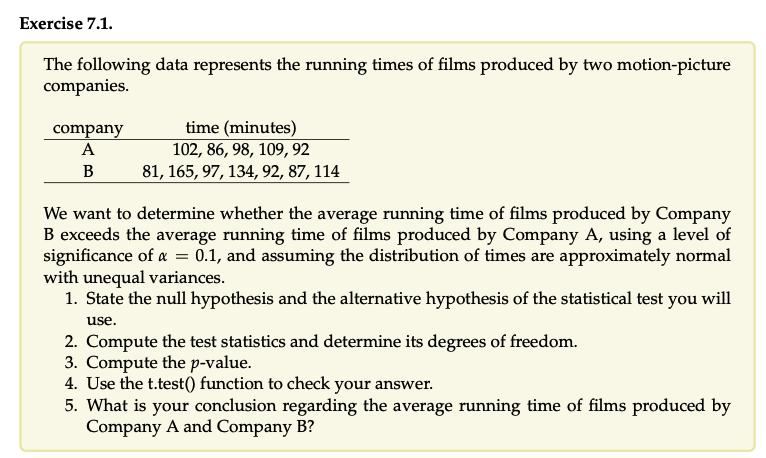

**Question 1**
- Let $\mu_A$ be the average running time of films produced by company A and $\mu_B$ be the average running time of films produced by company B.
- Null hypothesis: $\mu_A = \mu_B$
- Alternative hypothesis: $\mu_A < \mu_B$

**Question 2**

In [2]:
A = c(102, 86, 98, 109, 92)
B = c(81, 165, 97, 134, 92, 87, 114)

In [3]:
# Find sample mean and sample variance 

mean_A = mean(A)
mean_B = mean(B)

var_A = sd(A)^2
var_B = sd(B)^2

nA = length(A)
nB = length(B)

In [4]:
T = (mean_A - mean_B) / sqrt(var_A / nA + var_B / nB)
T 

[1] -1.041941

- The test statistics is -1.04.

In [5]:
v = (var_A / nA + var_B / nB)^2 / ((1 / (nA - 1) * (var_A / nA)^2) + (1 / (nB - 1) * (var_B / nB)^2))
v

[1] 7.375586

- Degree of freedom = 7.38

**Question 3**

In [6]:
p = pt(T, df = v) # T-test with test statistics T and degree of freedom v 
p

[1] 0.1651919

- The p-value is 0.165.

**Question 4 & 5**

In [8]:
t.test(A, B, var.equal = FALSE, alt = 'less')


	Welch Two Sample t-test

data:  A and B
t = -1.0419, df = 7.3756, p-value = 0.1652
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 10.13647
sample estimates:
mean of x mean of y 
     97.4     110.0 


- p-value = 0.165 > 0.1. 
- For $\alpha = 0.1$, we do not reject $H_0$ and conclude that there is not enough evidence to show that the average running time of films produced by company B exceeds the average running time of films produced by company A.

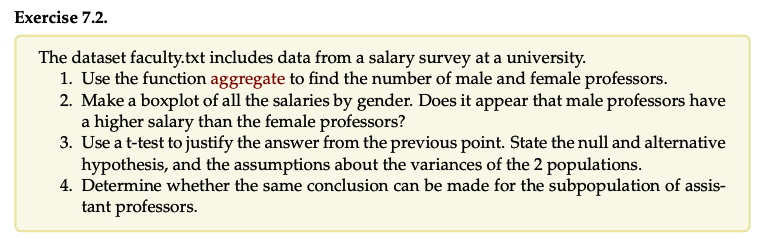

**Question 1**

In [9]:
survey = read.table('faculty.txt')
str(survey)

'data.frame':	514 obs. of  10 variables:
 $ salary   : num  38362 68906 55979 61008 42977 ...
 $ exprior  : int  0 2 0 0 5 4 1 0 0 0 ...
 $ yearsbg  : int  14 29 14 3 7 13 8 0 25 2 ...
 $ yearsrank: int  2 20 3 3 1 5 4 0 5 1 ...
 $ market   : num  0.72 1 1.04 1.24 0.99 ...
 $ termdeg  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ admin    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ yearsdg  : int  14 31 14 2 12 17 9 0 23 1 ...
 $ rank     : chr  "Associate" "Full" "Full" "Assistant" ...
 $ male     : chr  "Women" "Men" "Men" "Men" ...


In [10]:
head(survey)

,salary,exprior,yearsbg,yearsrank,market,termdeg,admin,yearsdg,rank,male
,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
1,38361.75,0,14,2,0.72,1,0,14,Associate,Women
2,68906.00,2,29,20,1.00,1,0,31,Full,Men
3,55979.00,0,14,3,1.04,1,0,14,Full,Men
4,61008.00,0,3,3,1.24,1,0,2,Assistant,Men
5,42977.00,5,7,1,0.99,1,0,12,Associate,Men
6,51640.00,4,13,5,0.99,1,0,17,Full,Women


In [11]:
aggregate(survey$salary, list(survey$male), FUN = length)

Group.1,x
<chr>,<int>
Men,386
Women,128


**Question 2**

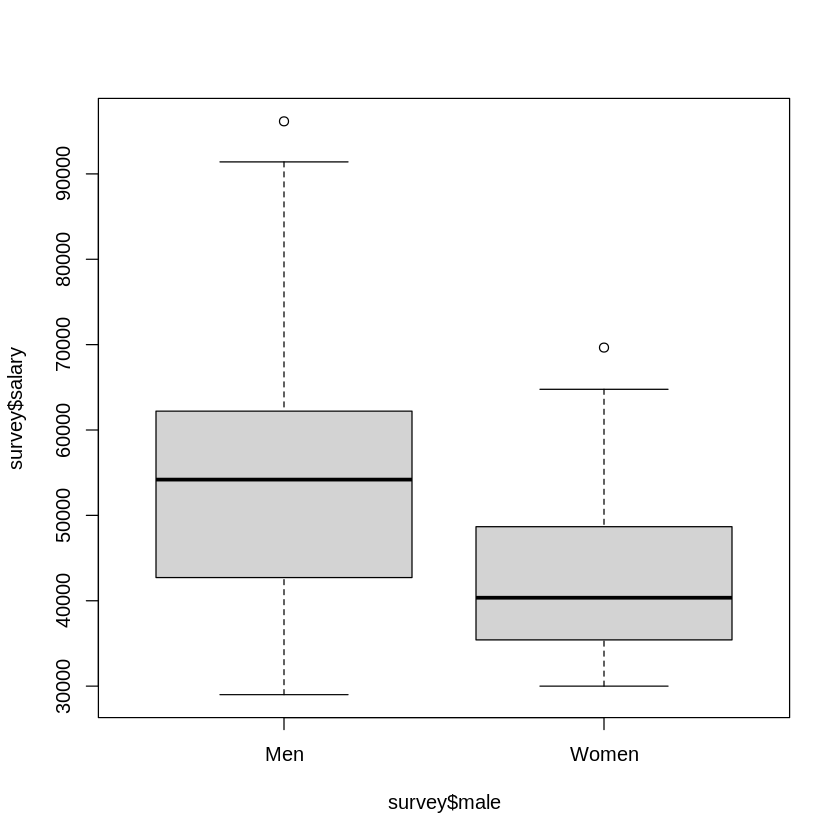

In [12]:
boxplot(survey$salary ~ survey$male)

- It appears that male professors have higher salary than female professors.

**Question 3**
- Let $\mu_M$ denote the average salary for male professors and let $\mu_F$ denote the average salary for female professors.
- Null hypothesis: $\mu_M = \mu_F$
- Alternative hypothesis; $\mu_M > \mu_F$ 

In [15]:
male = subset(survey, male == 'Men')
female = subset(survey, male == 'Women')

In [17]:
var.test(male$salary, female$salary)


	F test to compare two variances

data:  male$salary and female$salary
F = 1.8865, num df = 385, denom df = 127, p-value = 3.904e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.404604 2.481945
sample estimates:
ratio of variances 
          1.886505 


- We can reject the null hypothesis that the variance is equal.

In [18]:
t.test(male$salary, female$salary, alt = 'greater', var.equal = FALSE)


	Welch Two Sample t-test

data:  male$salary and female$salary
t = 10.25, df = 297.23, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 8879.088      Inf
sample estimates:
mean of x mean of y 
 53499.24  42916.60 


- We can reject the null hypothesis that the mean salary for male professors is the same as the mean salary for female professors.

**Question 4**

In [21]:
male_ass = subset(survey, (male == 'Men') & (rank == 'Assistant'))
female_ass = subset(survey, (male == 'Women') & (rank == 'Assistant'))

In [22]:
var.test(male_ass$salary, female_ass$salary)


	F test to compare two variances

data:  male_ass$salary and female_ass$salary
F = 1.911, num df = 82, denom df = 59, p-value = 0.009523
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.174675 3.050915
sample estimates:
ratio of variances 
           1.91096 


- We can reject the null hypothesis that the variance is equal.

In [23]:
t.test(male_ass$salary, female_ass$salary, alt = 'greater', var.equal = FALSE)


	Welch Two Sample t-test

data:  male_ass$salary and female_ass$salary
t = 2.9471, df = 141, p-value = 0.001878
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1715.509      Inf
sample estimates:
mean of x mean of y 
 41508.57  37593.45 


- We can reject the null hypotheis the means are the same for the two groups.

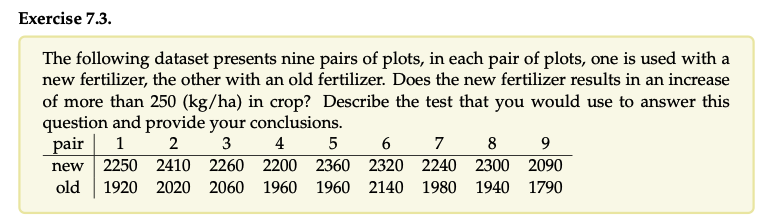

In [24]:
new = c(2250, 2410, 2260, 2200, 2360, 2320, 2240, 2300, 2090)
old = c(1920, 2020, 2060, 1960, 1960, 2140, 1980, 1940, 1790)

D = new - old
D

[1] 330 390 200 240 400 180 260 360 300

In [25]:
# Check for normality of D to apply variance and t-test
shapiro.test(D)


	Shapiro-Wilk normality test

data:  D
W = 0.94359, p-value = 0.6202


- We do not reject the null hypothesis that D is normally distributed.

- Null hypothesis: $\mu = 250$
- Alternative hypothesis: $\mu > 250$

In [26]:
t.test(D, mu = 250, alt = 'greater')


	One Sample t-test

data:  D
t = 1.6948, df = 8, p-value = 0.06428
alternative hypothesis: true mean is greater than 250
95 percent confidence interval:
 245.571     Inf
sample estimates:
mean of x 
 295.5556 


- With a significance level of $\alpha = 0.1$, we reject the null hypothesis and conclude that there is an increase of more than 250 kg/ha in crop.